In [2]:
import json 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open("partition_0_runtimes.json", 'r') as f:
    data = json.load(f)
# dict.fromkeys(data)
df = pd.DataFrame()
rt = {}
for d in data:
    for k,v in d.items():
        # print(rt.T)
        rt[k] = [v["runtime[ms]"],v["# of nodes"]]
        
df = pd.DataFrame(rt,index=["Runtime[ms]","# of nodes"]).T
df.to_csv("partition0_cpu_results.csv")
df

,Runtime[ms],# of nodes
MultiThreshold_6_out0,183.132648,14.0
MultiThreshold_13_out0,242.317200,28.0
MultiThreshold_17_out0,294.926643,36.0
MultiThreshold_12_out0,233.190536,26.0
MultiThreshold_2_out0,86.027145,6.0
...,...,...
MultiThreshold_11_out0,221.019506,24.0
MultiThreshold_4_out0,118.981361,10.0
MultiThreshold_16_out0,273.543119,34.0
MultiThreshold_14_out0,252.383947,30.0


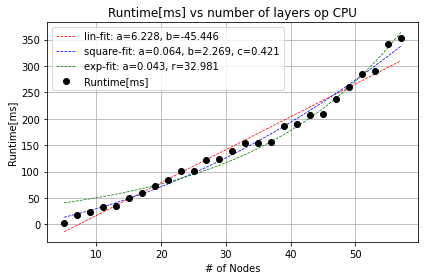

In [5]:
from scipy.optimize import curve_fit
import numpy as np

def lin(x,a,b):
    return a*x+b
def square(x,a,b,c):
    return a*x**2+b*x + c
def exp(x,r,a):
    return a*(1+r)**x

popt,popc = curve_fit(lin,df.index, df["Runtime[ms]"])
popq,popcq = curve_fit(square,df.index,df["Runtime[ms]"])
pope,popce = curve_fit(exp,df.index,df["Runtime[ms]"])

plt.figure()

plt.ylabel("Runtime[ms]")
plt.title("Runtime[ms] vs number of layers op CPU")
plt.plot(df.index, lin(df.index, *popt), 'r--',linewidth=.75,
         label='lin-fit: a=%5.3f, b=%5.3f' % tuple(popt)
         )
plt.plot(df.index, square(df.index, *popq), 'b--',linewidth=.75,
         label='square-fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popq)
         )
plt.plot(df.index, exp(df.index, *pope), 'g--', linewidth=.75,
         label='exp-fit: a=%5.3f, r=%5.3f' % tuple(pope)
         )
plt.plot(df.index,df["Runtime[ms]"], 'ko', linewidth=1, label= 'Runtime[ms]')
# sns.lineplot(data=df)
plt.grid()
plt.xlabel("# of Nodes")
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('w')
# plt.savefig("CPU_runtime_results.svg",dpi=400)
